# Introduction to ARIMA Models

## ACF and PACF

### Autocorrelation Function / Partial Autocorrelation Function
Before we can investigate <em>autoregression</em> as a modeling tool, we need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.




In [2]:
# imports dataset and libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

# Load non-stationary dataset

df1 = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df1.index.freq = 'MS' #monthly dataset

#load non-stationary dataset

df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col=0,parse_dates=True)
df2.index.freq = 'D' #Daily dataset

## Autocovariance for 1D

**Covariance** is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

The **covariance** of two variables x and y in a data set measures how the two are linearly related. A positive covariance would indicate a positive linear relationship between the variables, and a negative covariance would indicate the opposite.

For time series, x is a fixed interval. To calculate Covariance we will look at  $y_t$ against lagged or shifted values of $y_{t+k}$

For stationary time series, the autocovariance function is denoted by $\gamma$(gamma):

<center>${\displaystyle {\gamma}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$ </center>

Genralizing the formula:

<center>${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$</center>


Note: **Covariance** is not standardized. 

### Autocovariance Example:
Say we have a time series with five observations: {13, 5, 11, 12, 9}.<br>
We can quickly see that $n = 5$, the mean $\bar{y} = 10$, and we'll see that the variance $\sigma^2 = 8$.<br>
The following calculations give us our covariance values:
<br><br><center>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$ </center>
<br><br>
Note that $\gamma_0$ is just the population variance $\sigma^2$.

The `Statsmodels` function to calculate autocovariance is [stattools.acovf](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html) \([x,unbiased,demean,nlag..]). The main parameter for the function are:

- **x**: 1D array
- **Unbiased**: bool - If True then denominator is n-k, otherwise n.
- **demean**: bool - If true, then subtract the mean x from each value.
- **nlag** : int 



In [3]:
test = pd.DataFrame({'a':[13,5,11,12,9]})

arr= sm.tsa.stattools.acovf(test['a'])
arr # Value matches with our manual calculations

array([ 8. , -4. , -1.6,  2.2, -0.6])

### Unbiased Autocovariance
Note that the number of terms in the calculations above are decreasing.<br>Statsmodels can return an "unbiased" autocovariance where instead of dividing by $n$ we divide by $n-k$. <br><br>

<center>$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} {5-0} = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} {5-1} = \frac {-20} 4 = -5.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} {5-2} = \frac {-8} 3 = -2.67 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} {5-3} = \frac {11} 2 = 5.5 \\
\gamma_4 = \frac {(13-10)(9-10)} {5-4} = \frac {-3} 1 = -3.0$</center>

In [4]:
arr2 = sm.tsa.stattools.acovf(test['a'],unbiased=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

## Autocorrelation for 1D

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient: Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. The Correlation is denoted by $\rho$ (rho).

**Note:** What sets them apart is the fact that correlation values are standardized whereas, covariance values are not.

### <center> $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$ </center>

where $E$ is the expected values, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When comparing the single variable(i.e. autocorrelation) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation, the mean is the population mean, and not the mean of reduced lagged factor.

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

<center>${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$</center>


This can be written in terms of the $\gamma_k$ as:

<center>${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$</center>

For example,<br>
<center>$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$</center>

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$



The `Statsmodels` function to calculate AutoCorrelation is [stattools.acf](https://www.statisticshowto.com/q-value/) \([x,unbiased,nlags,qstat..]). The main parameter for the function are:

- **x**: 1D array
- **unbiased**: If True then denominator is n-k, otherwise n.
- **nlags**: Number of lags to return autocorrelation for.
- **qstat** : If True, returns the [Ljung-Box q statistic](https://cmparlettpelleriti.github.io/QStatistic.html) for each autocorrelation coefficient.

In [5]:
arr3 = sm.tsa.stattools.acf(test['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

## Partial Autocorrelation

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

For a given stochastic process, we are interested in connection between two random variable of process at different points in time.One way is to measure relationship with ACF. Another way to measure the connection between $X_t$ and $X_{t+\tau}$ to filter out linear relationship between $X_t$ and $X_{t+\tau}$.

A common method employs the non-recursive <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>Yule-Walker Equations</a>:

<center>$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$</center>.

The mathematics behind partial autocorrelation(easy ones which helped me) can be found in the links below:
- [Temple University](https://astro.temple.edu/~buck/notes/timeseries/Timeseri.HTM)
- [State University of New York](https://www.coursera.org/lecture/practical-time-series-analysis/yule-walker-equations-in-matrix-form-yw0tb)
- [Proffessor Barry Van Veen - Video](https://www.youtube.com/watch?v=PFyp4t16_xk)


We can pass `method='mle'` below to use biased ACF coefficients. We can pass `method = 'unbiased'` for unbiased ACF coefficient.

In [6]:
arr4 = sm.tsa.stattools.pacf_yw(test['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [7]:
arr5 =sm.tsa.stattools.pacf_yw(test['a'],nlags = 4,method='unbiased')
arr5

C:\Users\arao1\AppData\Local\Continuum\anaconda3\envs\virtual_env_tsa\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [8]:
arr6 = sm.tsa.stattools.pacf_ols(test['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### Partial Autocorrelation with OLS
Another method of calculating partial autocorrelation is with [ordinary least squares(OLS)](http://people.stern.nyu.edu/jsimonof/classes/2301/pdf/regtime.pdf)

In [9]:
arr7 =sm.tsa.stattools.pacf_ols(test['a'],nlags = 4)
arr7

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

# Plotting 

The array returned above for `.acf(df)` and `,pacf_yw(df)` shows autocorrelation for given y at time t. Before we plot, let's look at the data and infer If we have autocorrelation.

Pandas has inbuilt [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.lag_plot.html) to plot $y_t$ and its lag $y_{t-k}$. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way. 

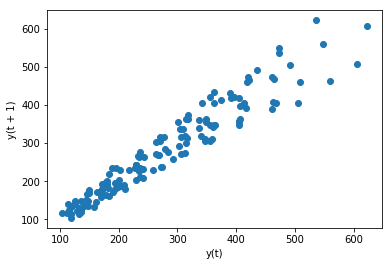

In [10]:
pd.plotting.lag_plot(df1['Thousands of Passengers']);

The visiual above shows a strong autocorrelation as $y_t$ value is increasing with lagged value increasing. Let's take a look at stationary dataset.

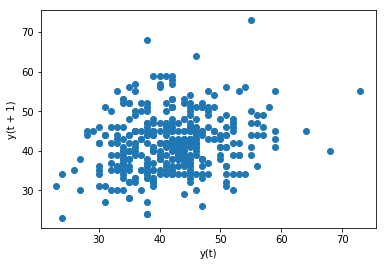

In [11]:
pd.plotting.lag_plot(df2['Births'])

No evidence of autocorrelation here.

# ACF Plots
Let's move on and plot autocorrelations over the lags and see what can be inferred.

Let us consider stationary dataset- df2(**Daily Total Female Births**).

In [12]:
#Autocorrelation Values
sm.tsa.stattools.acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

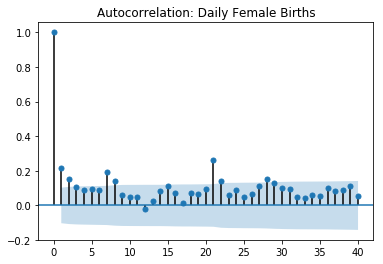

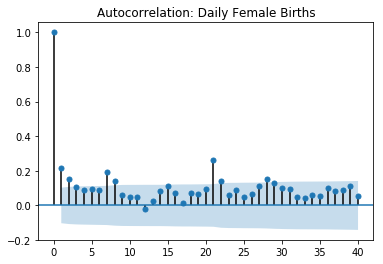

In [13]:
#ACF plots
sm.graphics.tsa.plot_acf(df2['Births'],title='Autocorrelation: Daily Female Births',lags=40)

This is one of the typical ACF plots for stationary data. The lags is on horizontal axis and correlation on vertical axis. The first value $y_0$ is always 1. The sharp dropoff indicates that there are no AR component in the ARIMA model.

Now let's take a look at non-stationary dataset - df1 (**Airline Passengers**)

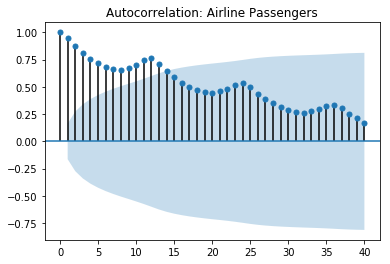

In [14]:
sm.tsa.graphics.plot_acf(df1['Thousands of Passengers'],lags=40,title='Autocorrelation: Airline Passengers');

This plot indicates non-stationary data, as there is a strong autocorrelation in the time series with their lags.

# PACF Plots
Let's take a look partial autocorrelation plot for stationary data - df2(**Daily Total Female Births**).


Keep in mind that you can specify the method for pacf plots in the `method` parameter. The default is *yule walker with bias correction*. Check out the [link](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html) for more details.

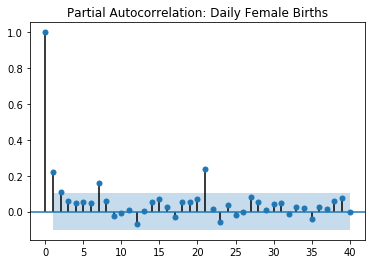

In [15]:
sm.graphics.tsa.plot_pacf(df2,lags = 40,title='Partial Autocorrelation: Daily Female Births');

To calculate partial autocorrelation for df1 (**Airline Passengers**), we need to first apply *differencing*, as we discussed above.

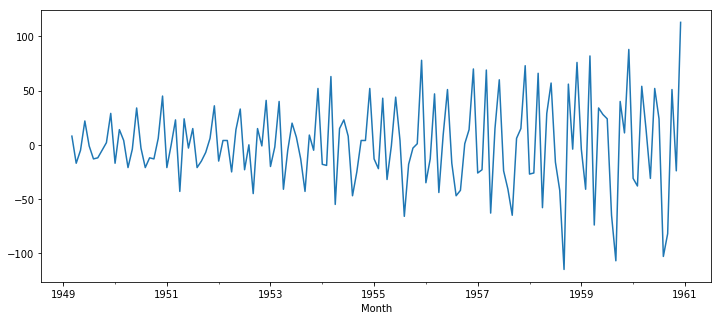

In [16]:
#We need to differnce it twice to completely make it stationary
df1['d2'] = sm.tsa.statespace.tools.diff(df1['Thousands of Passengers'],k_diff=2)
df1['d2'].plot(figsize= (12,5))

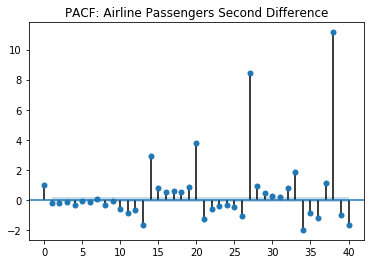

In [17]:
sm.graphics.tsa.plot_pacf(df1['d2'].dropna(),title='PACF: Airline Passengers Second Difference',lags = 40);

# Introduction to ARIMA Models

We'll investigate a variety of different forecasting models in this notebook, but they all will stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


**ARIMA** performs well when working with time series where data is directily related to time stamp. ARIMA cannot take into account any external factors, this is the reason we cannot use ARIMA modelling to predict stock prices.As a refresher, let's go over stationarity of dataset:

- A stationary series has constant mean and variance over time. 

- A stationary data set will allow our model to predict that mean and variance will be same in the future periods.
    - Mean should not be a function of time
    - Variance should not be a function of time
    - Covariance should not be function of time.



## AR(p)
### Autoregressive Model
In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### <center>$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$ </center>

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

<center> &nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$ </center>

whereas an <strong>AR(2)</strong> model would follow the formula

<center> &nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$ </center>

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

The `Statsmodels` function to calculate Autoregression is [stattools.tsa.AR](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) \([x,unbiased,nlags,qstat..]). The main parameter for the function are:

- endog - input variable
- dates - array of datetime object

### Import the data


In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

#load the US population dataset 

df = pd.read_csv('uspopulation.csv',index_col=0,parse_dates=True)

#assign index
df.index.freq = 'MS'

In [19]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


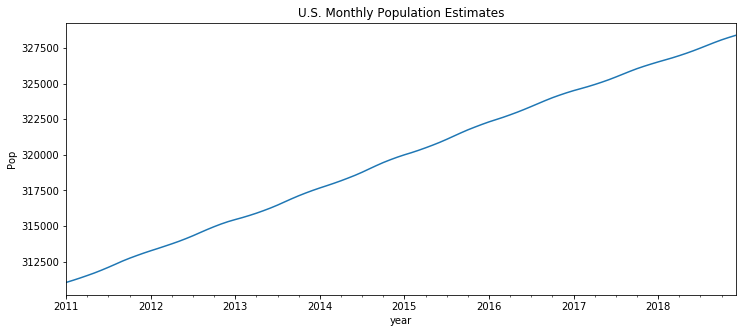

In [20]:
#Plot the Data
ax= df['PopEst'].plot(figsize = (12,5),title = 'U.S. Monthly Population Estimates');
ax.autoscale(axis = 'x',tight = True);
ax.set(xlabel = 'year',ylabel = 'Pop');

In [21]:
#train train split
print(len(df))
print(len(df)-12)


96
84


In [22]:
#set one year for testinng

train = df[:84]
test = df[84:]

train.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


### Fit an AR(1) model

If we take $y$ as time series variable then AR(1) also known as simple autoregressive model would be represent by:

<center> $y_t = c + \phi_{1}y_{t-1} + \varepsilon_{t}$ </center>
    
We can read this equation as - Values at given time period ($y_t$) are equal to some portion of $\phi_{1}$ of values in last period $y_{t-1}$ plus some constant benchmark(c) and unpredictable shock $\varepsilon_{t}$.

In [23]:
#Step 1:create an instance
model = sm.tsa.AR(train['PopEst'])

[model.fit()](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.fit.html) specific to AR. The code behind it can be checked out [here](https://www.statsmodels.org/stable/_modules/statsmodels/tsa/ar_model.html#AR.fit)

In [24]:
#Step 2:Fit the model with desired parameter.
#Shift + Tab after model.fit() too see the parameters available and definations
AR1fit = model.fit(maxlag=1,method='cmle')

In [25]:
print(f'Lag:{AR1fit.k_ar}')

print(f'Coeff"\n{AR1fit.params}')

Lag:1
Coeff"
const        284.913797
L1.PopEst      0.999686
dtype: float64


In [26]:
#Step3:Forecast
#Start = where train data ends
#end = Date when train data ends + 12 months
start = len(train)
end = len(train)+ len(test)-1

prediction_1 = AR1fit.predict(start= start,end=end).rename('AR(1) Predictions')

In [27]:
#results
prediction_1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

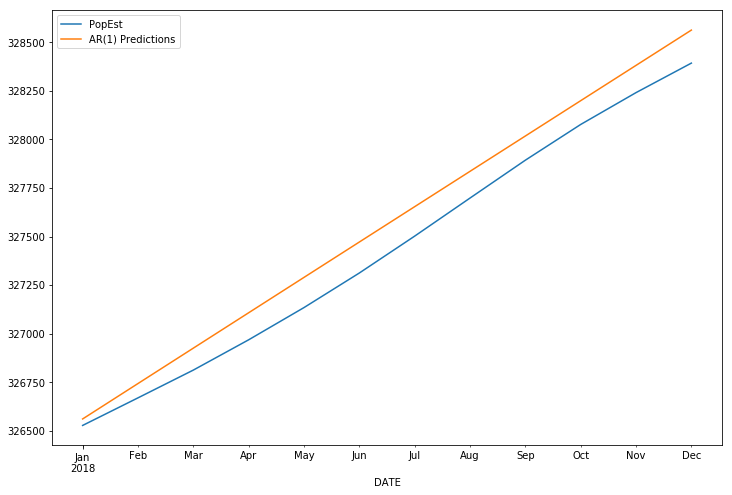

In [28]:
#let's plot it out
test['PopEst'].plot(figsize = (12,8),legend = True)
prediction_1.plot(figsize = (12,8),legend = True)


### Fit an AR(2) model
Keep in mind that we have already created instance of the model with the data set. We can jump to step 2:fitting the model with parameters

In [29]:
# Step 2 : fit the model
AR2fit = model.fit(maxlag=2,method='cmle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64


In [30]:
# Step 3 : forecast
prediction_2 = AR2fit.predict(start,end).rename('AR(2) Predictions')

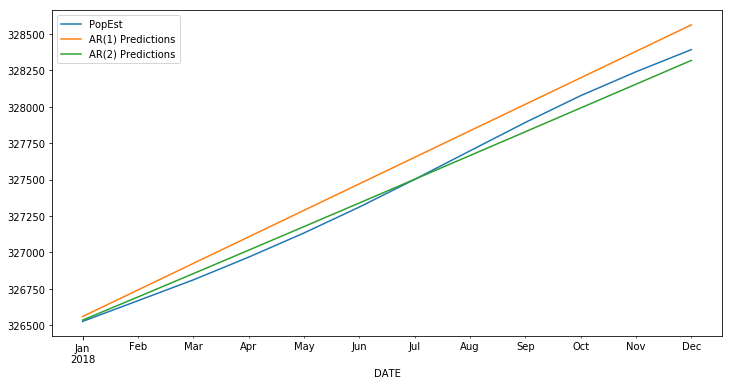

In [31]:
#plot
test['PopEst'].plot(legend=True)
prediction_1.plot(legend=True)
prediction_2.plot(legend=True,figsize=(12,6));

We can let `statsmodels` to perform a gridsearch and find the best lag(p).

### Fit an AR(p) model where statsmodels chooses p
We can pass maxlag as `none` to force the statsmodel to find the best p-value for us.Keep in mind that, to force `statsmodels` to optimize the value of `p` we need to specify the `ic` that is the criterion for selecting optimal lag length. If `ic` is not specified the p will default to:

<center>$ p = \frac {12*nobs}{100*4} $</center>


Check out the documentation.

In [32]:
#Step 2: Fit the model
ARfit = model.fit(method='cmle',ic='t-stat')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [33]:
prediction_8 = ARfit.predict(start,end).rename('AR(8) Prediction')

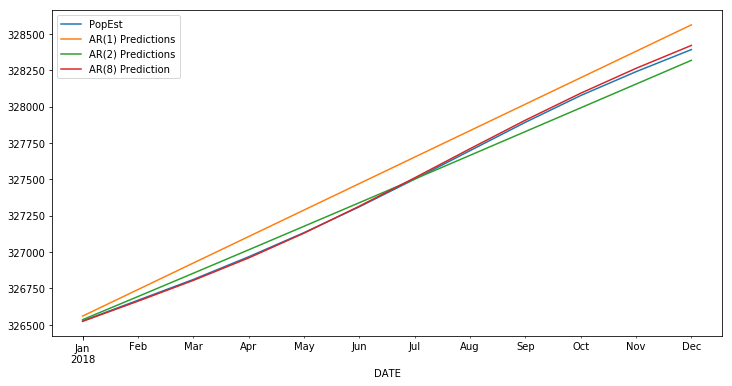

In [34]:
test['PopEst'].plot(legend=True)
prediction_1.plot(legend=True)
prediction_2.plot(legend=True)
prediction_8.plot(legend=True,figsize=(12,6));

## Evaluate the Model
Let us quantify the model using mean squared error.

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
labels = ['AR(1)','AR(2)','AR(8)']
preds = [prediction_1,prediction_2,prediction_8]

for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} error:{error}')

AR(1) error:17449.714239577344
AR(2) error:2713.258615675103
AR(8) error:186.97377437908688


You can try different solvers to check the results with different criterion.

## Forecasting using AR

In [37]:
#Step 1: create an instance
model = sm.tsa.AR(df['PopEst'])

#Step 2: Fit the model

ARfit = model.fit(method = 'cmle',ic ='t-stat')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 12
Coefficients:
const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64


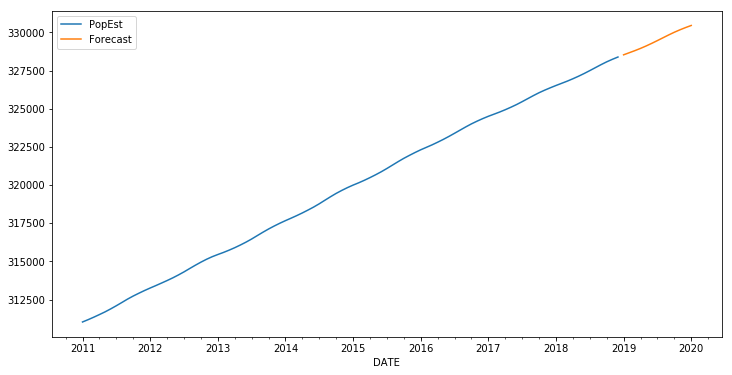

In [38]:
# Step 3: Make prediction

fcast = ARfit.predict(start=len(df),end = len(df)+12).rename('Forecast')

#Plot

df['PopEst'].plot(legend = True)
fcast.plot(legend = True,figsize = (12,6))

## Test For Stationarity

The ability to determine weather a time series is stationary is important. Till now we have been visually inferring If a time series is stationary or not. However, there are cases when stationarity cannot be determined visually. There might be cases where we want to determine if two series demonstrate correlation or causality.

A stationary series is one in which the statstical properties- mean,variance and covariance, do not vary with time. That is no matter where you take your observation, the results should be same. A time series that shows cyclical behavior is stationary. 

### Statistical Test

Instead of going for visual test, we can use statstical tests like unit root tests.Unit root indicates that the statstical properties of a given series are not constant and thus non-stationary. 

Consider the AR(1) model below: 

<center> $y_t = c + \phi y_{t-1} + \varepsilon_{t}$ </center>

where $y_t$ is the value at time instant t, $y_{t-1}$ is the value at lag 1 and $\varepsilon_{t}$ is the error term. In order to calculate $y_t$ we need to calculate $y_{t-1}$:
<br>
<center> $y_{t-1} = c + \phi y_{t-2} + \varepsilon_{t-1}$ </center>

If we write this out recursively: 

<center> $y_{t} = c + \phi ^{n}y_{t-n} + \sum \varepsilon_{t-i}\phi ^{i}$ </center>

If the value of $\phi$ is 1 in the above equation, then the forecast wll be equal to y_{t-n} and sum of all the errors, which means variance will increase with time. This is known as unit root in time series.The unit root tests check the presence of unit root in the series by checking if value of $\phi$=1.


A test for stationarity usually involves a unit root hypothese, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity.

### Augmented Dickey-Fuller Test

[Augmented Dickey-Fuller Test](https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html) is a popular stastical test to check the presence of unit root in time series.ADF tests the null hypothesis that a unit root is present in time series sample. ADF statistic is a negative number and more negative it is the stronger the rejection of the hypothesis that there is a unit root.

- **Null Hypothesis(H0)**:$\phi = 1$,The series has a unit root. If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternative Hypothese(H1)**:The series has no null root. If the null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary.

Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

In [39]:
#Data import
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

#load a non-stationary dataset
df1 =pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df1.index.freq = 'MS'

#Load a stationary
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col=0,parse_dates=True)
df2.index.freq = 'D'

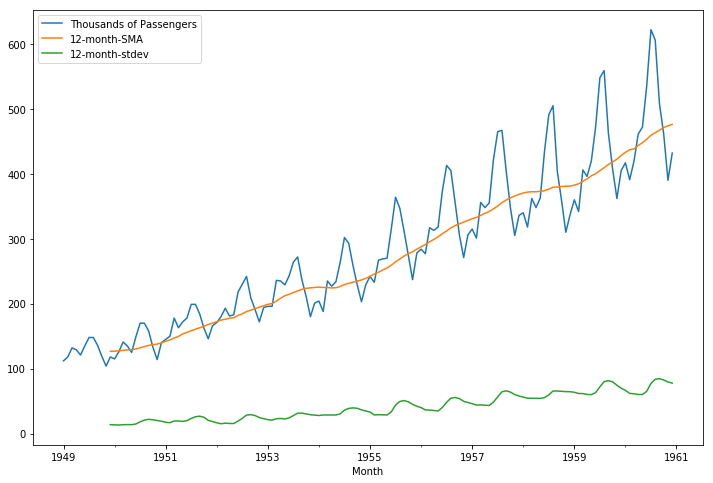

In [40]:
#non-stationary data
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-stdev'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-stdev']].plot(figsize = (12,8));

The dataset has clear trend, seasonality, and increasing standard deviation over time as well.

We will use [sm.tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) with parameters:

- **x** -: Data series to test
- **maxlag** -: Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
- **regression** -: Constant and trend order to include in regression. We will use constant regression most of the time as it it has the most [stastical power](https://en.wikipedia.org/wiki/Power_of_a_test)
- **autolag** -: If we want to force the function to calulate the the `maxlag`, we can use the information criterion provided by function.

The maths behind [sm.tsa.stattools.adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) is a little bit rigorous, you can check out this [link](http://www.ams.sunysb.edu/~zhu/ams586/UnitRoot_ADF.pdf).

The function returns multiple test statistics, which can be checked out below using `help` function.

In [41]:
help(sm.tsa.stattools.adfuller);

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [42]:
print('Augmented Dickey-Fuller Test on Airline Data:\n')

dftest = sm.tsa.stattools.adfuller(df1['Thousands of Passengers'],regression='c',autolag = 'AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data:



(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

This throws out a rather ugly output which is difficult to interpret. Let's use the help function above to give these value a tag.

In [43]:
#There is a dict after the 4th index
dfout = pd.Series(dftest[:4],index=['ADF Test statistic','p-value','# of lags','# of Observations'])

for key,val in dftest[4].items():
    dfout[f'Critical Value({key})'] = val
    
print(dfout)

ADF Test statistic       0.815369
p-value                  0.991880
# of lags               13.000000
# of Observations      130.000000
Critical Value(1%)      -3.481682
Critical Value(5%)      -2.884042
Critical Value(10%)     -2.578770
dtype: float64


The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals. 

The p-value is 0.99, which is very high, which provides a weak evidence against the null hypothesis, and we fail to reject the null hypothesis. Thus, our dataset is not stationary.

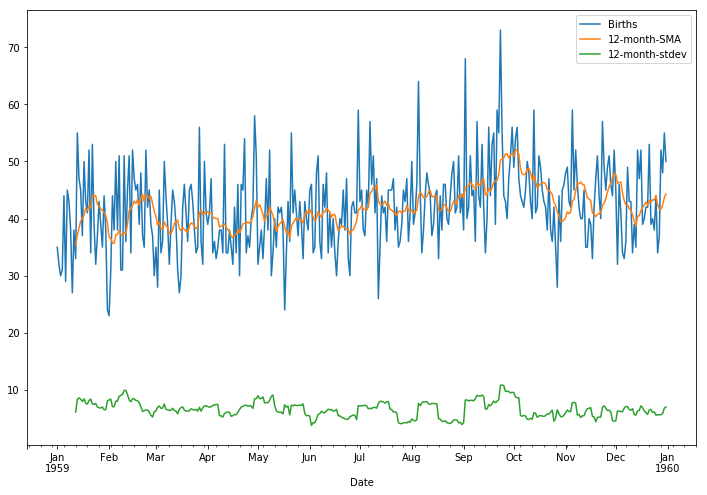

In [44]:
#Stationary data
df2['12-month-SMA'] = df2['Births'].rolling(window=12).mean()
df2['12-month-stdev'] = df2['Births'].rolling(window=12).std()

df2[['Births','12-month-SMA','12-month-stdev']].plot(figsize = (12,8));

The dataset has no trend, seasonality, and same standard deviation over time as well.

In [45]:
print('Augmented Dickey-Fuller Test on Airline Data:\n')

dftest = sm.tsa.stattools.adfuller(df2['Births'],regression='c',autolag = 'AIC')


dfout = pd.Series(dftest[:4],index=['ADF Test statistic','p-value','# of lags','# of Observations'])

for key,val in dftest[4].items():
    dfout[f'Critical Value({key})'] = val
    
print(dfout)

Augmented Dickey-Fuller Test on Airline Data:

ADF Test statistic      -4.808291
p-value                  0.000052
# of lags                6.000000
# of Observations      358.000000
Critical Value(1%)      -3.448749
Critical Value(5%)      -2.869647
Critical Value(10%)     -2.571089
dtype: float64


In this case our p-value is very low at 0.000052, and we do reject the null hypothesis. The dataset is stationary. 


This test is frequently used, so we will write a function so that we can call anytime:

In [46]:
def adf_test(series,title = '',p=0.05):
    """
    Pass in a time series,an optional title and cut off value, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = sm.tsa.stattools.adfuller(series.dropna(),regression='c',autolag = 'AIC')
    
    out = pd.Series(result[0:4],index = ['ADF test statistic','p-value','# lags used','# observations'])
    
    for key,val in result[4].items():
        out[f'critical value({key})'] = val
        
    print(out.to_string())
    
    if result[1] <=p:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

The function above can be modified to return true or false value for stationarity.

In [47]:
# Function Check
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.815369
p-value                  0.991880
# lags used             13.000000
# observations         130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Granger Causality Tests
As you would have learned on many occasions, correlation doesn't necessarily imply causailty, and hile we can measure the degree of association between two variables, i.e. correlation, it is harder to determine whether one variable causes another variable.

Although generally, we don’t believe that a present or future event can cause a past event, we do believe that it is possible that a past event can cause a present or future event. This is the impetuous for the Granger’s Causality test on time-series data that gives evidence that variable x causes y.

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. 

$X(t)$ granger causes Y(t), if the past values of X(t) helps in predicting the future. 

Mathamatically:

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Univariate Series: $y_t = a_0 + a_1 * y_{t-1}$

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Multivariate Series : $y_t = a_0 + a_1 * y_{t-1} + b_2 * X_{t-2}$

Where $a_0$, $a_1$ and $b_2$ is regression coefficients. Generalizing the formula:

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $y_i = a_0 + \sum_{j=1}^{m} a_j * y_{i-j} + \sum_{j=1}^{m} b_j * X_{i-j} + \varepsilon_{i}$

The hypothesis test for t-test would be:

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $H_0: b_1 = b_2 = b_3=.....=b_n = 0 $ <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $H_1: b_1 \neq b_2 \neq b_3\neq..... \neq b_n = 0$

We use F test to determine whether there is a significant difference betweeb regression model with added $X_{i-j}$.Some Key Points:

- The Granger Causality test assumes that both the x and y time series are stationary.
- The number of lags is critical, in that different values of lags may lead to different test results. One approach to selecting an appropriate value for m is to choose the value that results in the full model with the smallest AIC or BSC value.
- It is possible that causation is only in one direction, or in both directions (x Granger-causes y and y Granger causes x) or in neither direction.

The stattools [<tt><strong>grangercausalitytests</strong></tt>](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html) function offers four tests for granger non-causality of 2 timeseries. We will learn how to use the function below:


In [48]:
# Sample Data Import
df3 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


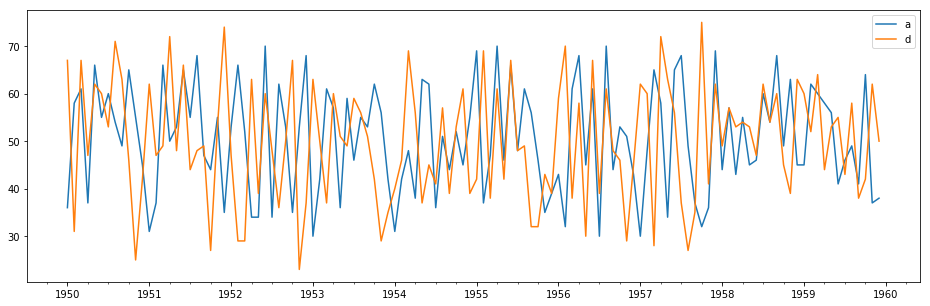

In [49]:
#Plot
#Both data are stationary
#Difficult to infer causality
df3[['a','d']].plot(figsize=(16,5),legend = True);

It's hard to tell from this overlay but <tt>df['d']</tt> almost perfectly predicts the behavior of <tt>df['a']</tt>.<br>
To see this more clearly (spoiler alert!), we will shift <tt>df['d']</tt> two periods forward.

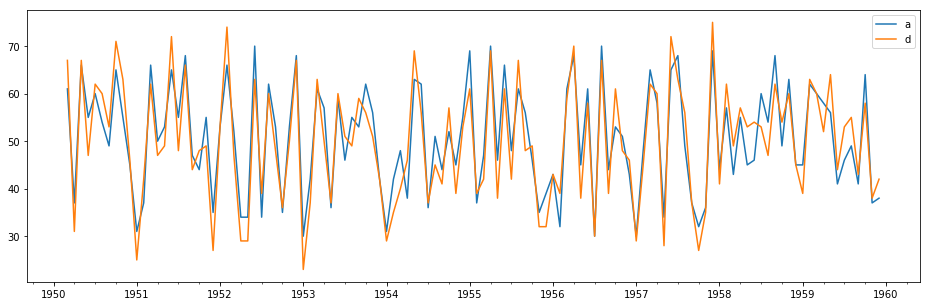

In [50]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);

In cases like these, Granger test provides us with vital tool to explore time series like these.

In [51]:
sm.tsa.stattools.grangercausalitytests(df3[['a','d']],maxlag=3);



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


Essentially we're looking for extremely low p-values, which we see at lag 2. We can feed this to our model.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.

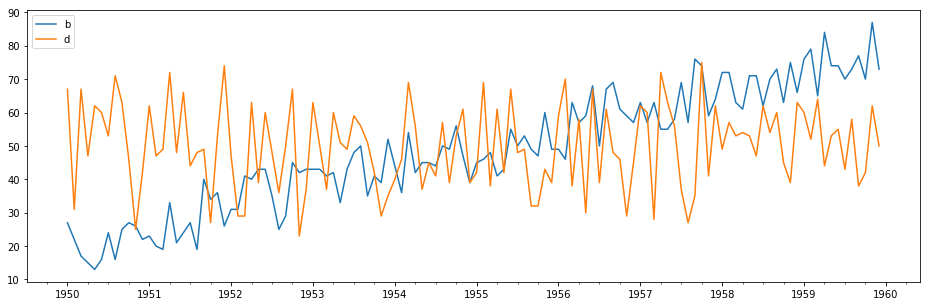

In [52]:
df3[['b','d']].plot(figsize=(16,5));

In [53]:
sm.tsa.stattools.grangercausalitytests(df3[['b','d']],maxlag=5);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

In [54]:
help(sm.tsa.stattools.grangercausalitytests)

Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=True)
    four tests for granger non causality of 2 timeseries
    
    all four tests give similar results
    `params_ftest` and `ssr_ftest` are equivalent based on F test which is
    identical to lmtest:grangertest in R
    
    Parameters
    ----------
    x : array, 2d
        data for test whether the time series in the second column Granger
        causes the time series in the first column
    maxlag : integer
        the Granger causality test results are calculated for all lags up to
        maxlag
    verbose : bool
        print results if true
    
    Returns
    -------
    results : dictionary
        all test results, dictionary keys are the number of lags. For each
        lag the values are a tuple, with the first element a dictionary with
        teststatistic, pvalues, degrees of freedom, the second element are
        the OLS estim

# AIC
The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

In plain words, AIC is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given dataset. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same dataset. A lower AIC score is better. AIC is particularly valuable for time series, because time series analysis’ most valuable data is often the most recent, which is stuck in the validation and test sets. As a result, training on all the data and using AIC can result in improved model selection over traditional train/validation/test model selection methods.

AIC works by evaluating the model’s fit on the training data, and adding a penalty term for the complexity of the model (similar fundamentals to regularization). The desired result is to find the lowest possible AIC, which indicates the best balance of model fit with generalizability. This serves the eventual goal of maximizing fit on out-of-sample data.


<center> $AIC = -2*ln(L) + 2*k$</center>

where:

- $L$ = Likelihood
- $k$ = # of parameters


These functions are available as

&nbsp;&nbsp;&nbsp;&nbsp;<tt> [from statsmodels.tools.eval_measures import aic](https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.aic.html)</tt>

# Choosing ARIMA orders

ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

## Choosing the order using package Pyramid Arima



This is a third-party tool separate from statsmodels. Before using the [statsmodels.tsa.arima_model.ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html), let us understand a package that does all the heavy lifting for us. You can install this package called [pyramid arima](https://alkaline-ml.com/pmdarima/setup.html) using:

**<center> pip install pmdarima </center>**

Pmdarima uses Cython, which means there is some C source that was built in the distribution process. 






In [55]:
#import the package
import pmdarima

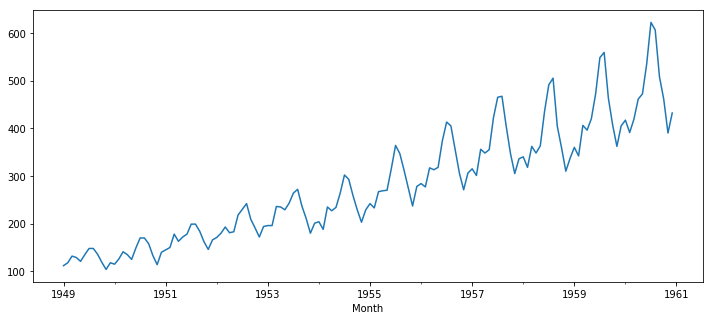

In [56]:
#datasets

#non-stationary dataset
df1['Thousands of Passengers'].plot(figsize=(12,5))

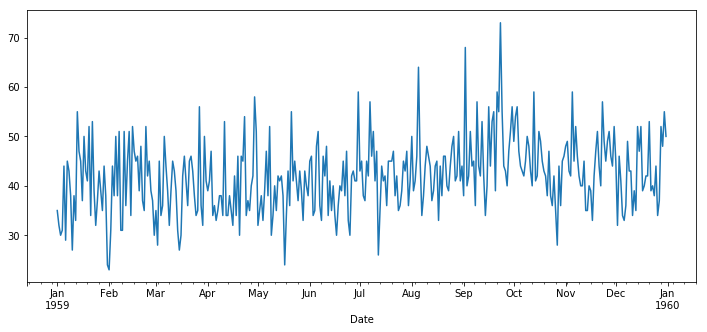

In [57]:
#Stationary dataset
df2['Births'].plot(figsize=(12,5))

In [58]:
import pmdarima as pm
#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

We will be using [**`pmdarima.arima.auto_arima(y,exogenous,....)`**](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) function.The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. Since `auto_arima()` takes care of p,d, and q, we do not need to make sure that time series is stationary.

The auto_arima is a heavy function with a lot of parameters, let's check it out

In [59]:
#the auto_arima is a heavy function with a lot of parameters, let's check it out
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R functio

Please note that default IC is AIC, the model will stop looking for additional parameters once it finds the lowest AIC value. We use `trace` to check all the steps. Let's look first at the stationary, non-seasonal <strong>Daily Female Births</strong> dataset:

In [60]:
stepwise_fit = pm.auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise


Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.253 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2462.045, BIC=2485.428, Fit time=0.342 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.167 seconds
Total fit time: 0.926 seconds


In [61]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Tue, 18 Aug 2020   AIC                           2460.154
Time:                        00:56:03   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

This shows a recommended (p,d,q) ARIMA Order of (1,1,1), with no seasonal_order component.Now let's look at the non-stationary, seasonal <strong>Airline Passengers</strong> dataset:

In [62]:
stepwise_fit = pm.auto_arima(df1['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.245 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.212 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.079 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=0.453 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.963, BIC=1034.214, Fit time=1.184 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.375, BIC=1047.751, Fit time=1.294 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.095, BIC=1038.221, Fit time=1.646 seconds
Fit ARIMA: order=(1, 1, 1) s

In [63]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.482
Date:                            Tue, 18 Aug 2020   AIC                           1016.963
Time:                                    00:56:12   BIC                           1034.214
Sample:                                         0   HQIC                          1023.973
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0057      0.179      0.032      0.975      -0.345       0.356
ar.L1         -0.3769      0.077     -4.901      0.000      -0.528      -0.226
ar.S.L12       0.6881      0.140      4.898      0.000       0.413       0.963
ar.S.L24       0.3097      0.107      2.896      0.004       0.100       0.519
ma.S.L12      -0.9708      0.461     -2.107      0.035      -1.874      -0.068
sigma2       113.3200     43.250      2.620      0.009      28.552     198.088
===================================================================================
Ljung-Box (Q):                       58.65   Jarque-Bera (JB):                12.09
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARMA(p,q) and ARIMA(p,d,q)

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp; <center> $y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$ </center>

while an <strong> MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp; <center> $y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$ </center>

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ , $\phi_1$ is the AR lag coefficient, $\theta_1$  is the MA lag coefficient, and $\varepsilon$  is white noise.


An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp; <center> $y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$ </center>

ARMA models can be used on stationary datasets.



In [79]:
#Load Datasets
df1 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col=0,parse_dates=True)
df1.index.freq = 'D'

df1 = df1[:120] #the dataset gets seasonal after 4 months

df2 = pd.read_csv('TradeInventories.csv',index_col=0,parse_dates=True)
df2.index.freq = 'MS'

### ARMA(p,q) 
An ARMA model, or Autoregressive Moving Average model, is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for autoregression, the second for the moving average.

Often this model is referred to as the ARMA(p,q) model; where:

- p is the order of the autoregressive polynomial,
- q is the order of the moving average polynomial.

### Difference Between an ARMA model and ARIMA

The two models share many similarities. In fact, the AR and MA components are identical, combining a general autoregressive model AR(p) and general moving average model MA(q). AR(p) makes predictions using previous values of the dependent variable. MA(q) makes predictions using the series mean and previous errors.

What sets ARMA and ARIMA apart is differencing. An ARMA model is a stationary model; If your model isn’t stationary, then you can achieve stationarity by taking a series of differences. The “I” in the ARIMA model stands for integrated; It is a measure of how many nonseasonal differences are needed to achieve stationarity. If no differencing is involved in the model, then it becomes simply an ARMA.


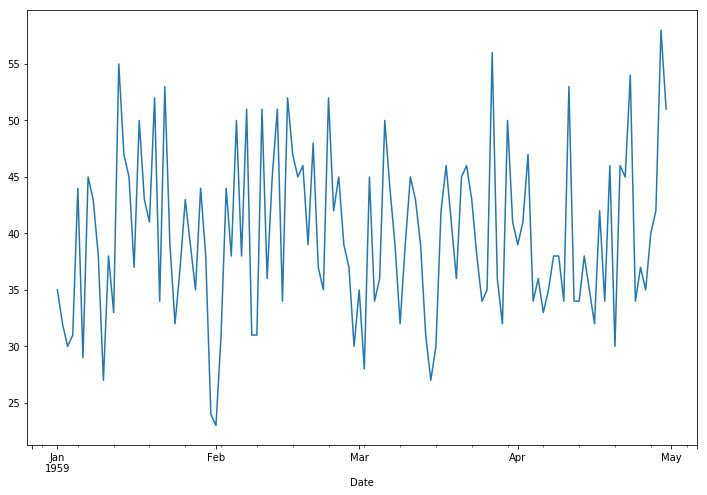

In [80]:
df1['Births'].plot(figsize=(12,8));

In [81]:
# Augmented Dickey-Fuller Test
# Function already created above
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic    -9.855384e+00
p-value                4.373545e-17
# lags used            0.000000e+00
# observations         1.190000e+02
critical value(1%)    -3.486535e+00
critical value(5%)    -2.886151e+00
critical value(10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [85]:
# Determine the (p,q) ARMA order 

pmdarima.auto_arima(df1['Births'],seasonal=False,start_p=1,start_q=1,stationary=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Tue, 18 Aug 2020   AIC                            823.489
Time:                        01:52:39   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

To run the ARMA model, we will use [statsmodels.tsa.arima_model.ARMA(endog,order....)](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMA.html) to train,model and fit the ARMA(1,1)

In [86]:
# Set one month for testing

train = df1.iloc[:90]
test = df1.iloc[90:]

In [88]:
# Training the model
model = sm.tsa.ARMA(train['Births'],order = (1,1))
results = model.fit(ic = 'aic')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(1, 1)   Log Likelihood                -307.967
Method:                       css-mle   S.D. of innovations              7.410
Date:                Tue, 18 Aug 2020   AIC                            623.934
Time:                        01:52:52   BIC                            633.934
Sample:                    01-01-1959   HQIC                           627.967
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7561      0.907     43.817      0.000      37.978      41.534
ar.L1.Births     0.4879      0.810      0.603      0.548      -1.099       2.075
ma.L1.Births    -0.4038      0.845     -0.478      0.634      -2.060       1.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0497           +0.0000j            2.0497            0.0000
MA.1            2.4766           +0.0000j            2.4766            0.0000
-----------------------------------------------------------------------------
"""

In [89]:
# create the forecast
start = len(train)
end = len(train) + len(test) - 1 #1 month of prediction
prediction = results.predict(start,end)

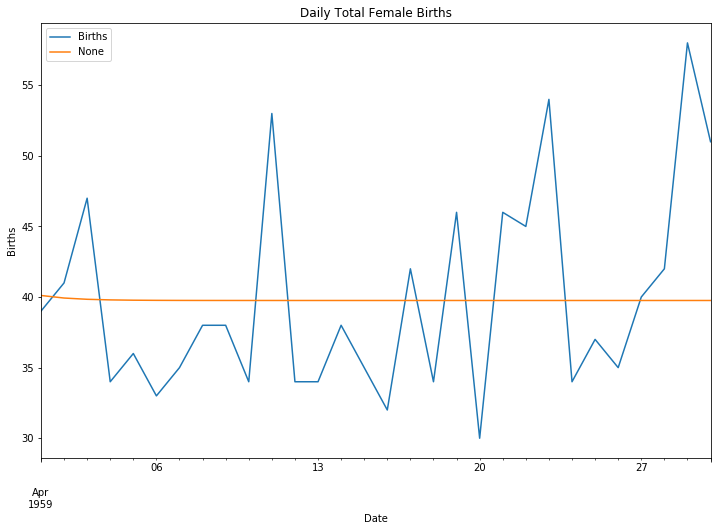

In [92]:
#plot against test data
title = 'Daily Total Female Births'
ylabel='Births'


ax = test['Births'].plot(legend=True,figsize=(12,8),title=title)
prediction.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel=ylabel);

We can evaluate the results using  the functions 

In [137]:
#Weighted Mean Absolute Percentage Error
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return "{0:.000%}".format(ft_wmape_forecast)         

In [102]:
#15% error is not bad
wmape(test['Births'],prediction)

'15%'

### Autoregressive Integrated Moving Average - ARIMA(p,d,q)

The steps are the same as for above, except that we'll apply a differencing component to make the dataset stationary.<br>
First let's take a look at the <em>Real Manufacturing and Trade Inventories</em> dataset.

[Text(0, 0.5, 'Chained 2012 Dollars')]

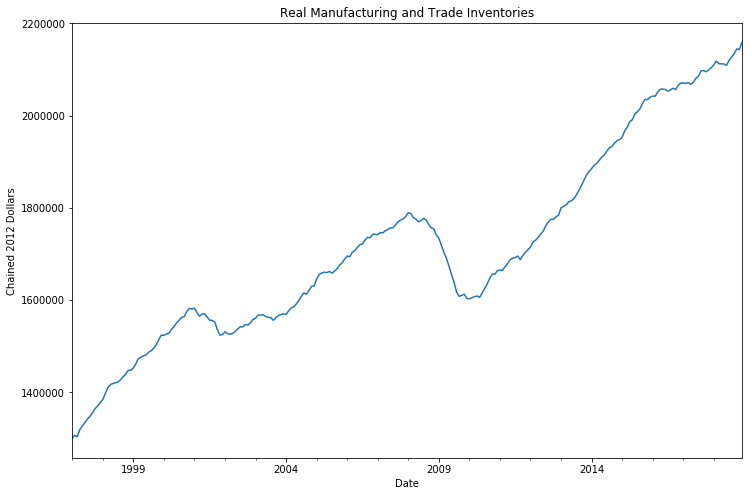

In [105]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'

ax = df2['Inventories'].plot(figsize=(12,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel=ylabel)

In [107]:
# Determine the (p,d,q) ARIMA order 

pmdarima.auto_arima(df2['Inventories'],seasonal=False,start_p=0,start_q=0,max_p=5,max_q=5,trace= True).summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.015 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.087 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.388, Fit time=0.096 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.098 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.116 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.482 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Tue, 18 Aug 2020   AIC                           5228.505
Time:                        02:13:21   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3474.3920   1313.749      2.645      0.009     899.492    6049.292
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

This suggests that we should fit an ARIMA(1,1,1) model for the series. 

In [108]:
#check for stationarity
#Not Stationary
adf_test(df2['Inventories'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.087684
p-value                  0.950652
# lags used              5.000000
# observations         258.000000
critical value(1%)      -3.455953
critical value(5%)      -2.872809
critical value(10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [110]:
#difference the data
# 1st difference is stationary
adf_test(sm.tsa.statespace.tools.diff(df2['Inventories']))

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.412249
p-value                  0.010548
# lags used              4.000000
# observations         258.000000
critical value(1%)      -3.455953
critical value(5%)      -2.872809
critical value(10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


####  Run the ACF and PACF plots
A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>
Alternatively, we can compare the stepwise <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike Information Criterion (AIC)</a> values across a set of different (p,q) combinations to choose the best combination

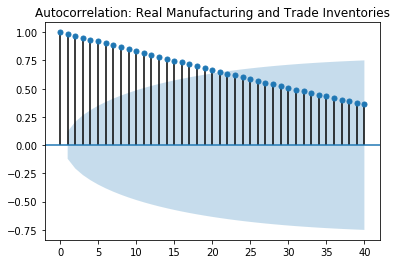

In [112]:
sm.tsa.graphics.plot_acf(df2['Inventories'],title='Autocorrelation: Real Manufacturing and Trade Inventories',lags=40);

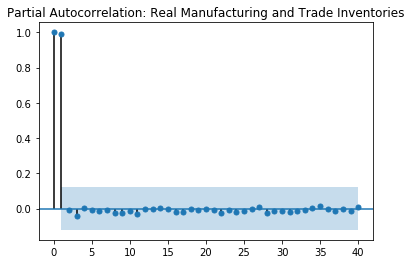

In [113]:
sm.tsa.graphics.plot_pacf(df2['Inventories'],title='Partial Autocorrelation: Real Manufacturing and Trade Inventories',lags=40);

This tells us that the time series has an AR signature. From the <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>:<br>
> <em>If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.</em><br>

In [114]:
## Determine the (p,d,q) ARMA order 

pmdarima.auto_arima(df2['Inventories'],start_p=0,start_q=0,max_p=5,max_q=5,seasonal=False,trace = True).summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.014 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.091 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.388, Fit time=0.080 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.102 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.127 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.489 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Tue, 18 Aug 2020   AIC                           5228.505
Time:                        02:22:17   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3474.3920   1313.749      2.645      0.009     899.492    6049.292
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7447           +0.0000j            1.7447            0.0000
-----------------------------------------------------------------------------
"""

In [115]:
len(df2)

264

In [131]:
#one year of test
train = df2[:252]
test = df2[252:]

start=len(train)
end=len(train)+len(test)-1

In [132]:
#model,fit and predict using ARIMA(1,1,1)
Model = sm.tsa.ARIMA(train['Inventories'],order = (1,1,1))
results = Model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Tue, 18 Aug 2020   AIC                           4980.790
Time:                        02:46:14   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.874      2.378      0.018     561.666    5833.474
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [133]:
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(1,1,1) Predictions')

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

[Text(0, 0.5, 'Chained 2012 Dollars')]

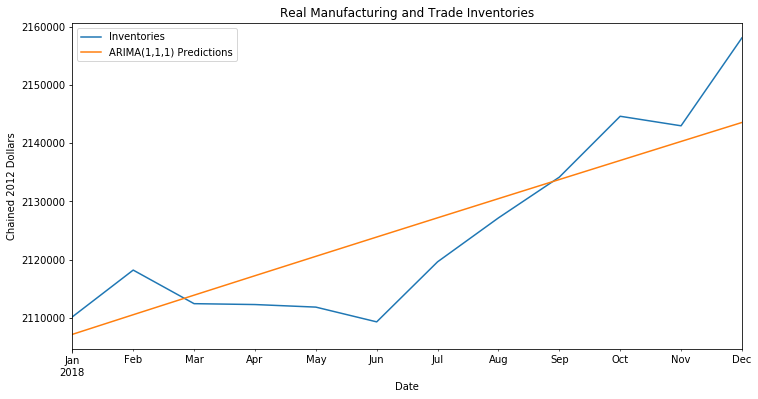

In [135]:
#Plot prediction against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'


ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set( ylabel=ylabel)


In [138]:
#WMAPE
wmape(test['Inventories'],predictions)

'0%'

In [139]:
#RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error:  7789.59705


In [140]:
#comapre to mean
test['Inventories'].mean()

#7789 error on 2125075 is good

2125075.6666666665

### Run the model for the full data

In [141]:
model = sm.tsa.ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

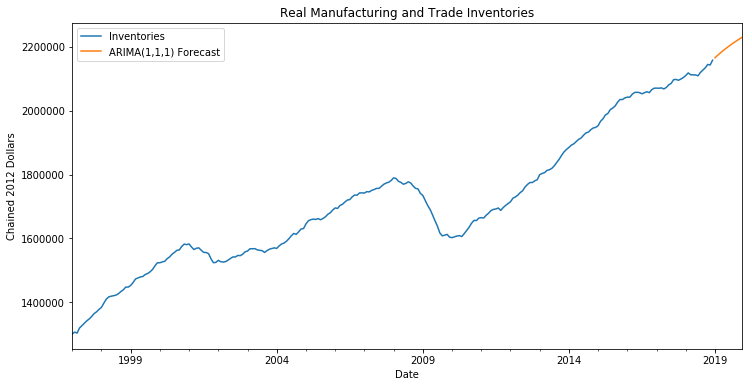

In [144]:
#plot prediction against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'


ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);